In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
MPI_df = pd.read_csv("MPI/timeInfo_MPI.csv")
min_MPI = MPI_df[MPI_df["Size of lattice"] == "50x50"].groupby("Num of cores").min()
min_MPI

,Size of lattice,Number of MC steps,Reduced temperature,Run time (s)
Num of cores,,,,
1,50x50,50,0.5,6.471489
2,50x50,50,0.5,4.961194
4,50x50,50,0.5,4.129089
6,50x50,50,0.5,2.140980
8,50x50,50,0.5,2.055811
10,50x50,50,0.5,2.025838
12,50x50,50,0.5,4.385178
14,50x50,50,0.5,1.967495
16,50x50,50,0.5,2.004812


In [3]:
numba_df = pd.read_csv("Numba/timeInfo_Numba.csv")
min_numba = numba_df[numba_df["Size of lattice"] == "50x50"].groupby("Num of cores").min()
min_numba

,Size of lattice,Number of MC steps,Reduced temperature,Run time (s)
Num of cores,,,,
2,50x50,50,0.5,0.340189
4,50x50,50,0.5,0.082326
6,50x50,50,0.5,0.082241
8,50x50,50,0.5,0.080907
10,50x50,50,0.5,0.079259
12,50x50,50,0.5,0.081039
14,50x50,50,0.5,0.080723
16,50x50,50,0.5,0.080099
18,50x50,50,0.5,0.081052


In [4]:
cythonMPI_df = pd.read_csv("Cython_MPI/timeInfo_Cy.csv")
min_CyMPI = cythonMPI_df[cythonMPI_df["Size of lattice"] == "50x50"].groupby("Num of cores").min()
min_CyMPI

,Size of lattice,Number of MC steps,Reduced temperature,Run time (s)
Num of cores,,,,
2,50x50,50,0.5,0.235276
4,50x50,50,0.5,0.146947
6,50x50,50,0.5,0.128030
8,50x50,50,0.5,0.116381
10,50x50,50,0.5,0.109289
12,50x50,50,0.5,0.103044
14,50x50,50,0.5,0.097621
16,50x50,50,0.5,0.098569
18,50x50,50,0.5,0.091659


Text(0, 0.5, 'Time taken to run the code (s)')

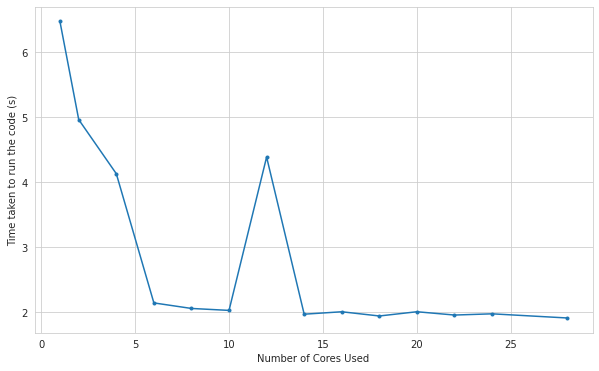

In [5]:
plt.figure(figsize=(10,6))
plt.plot(min_MPI.index, min_MPI["Run time (s)"], ".-")
plt.xlabel("Number of Cores Used")
plt.ylabel("Time taken to run the code (s)")

Text(0, 0.5, 'Time taken to run the code (s)')

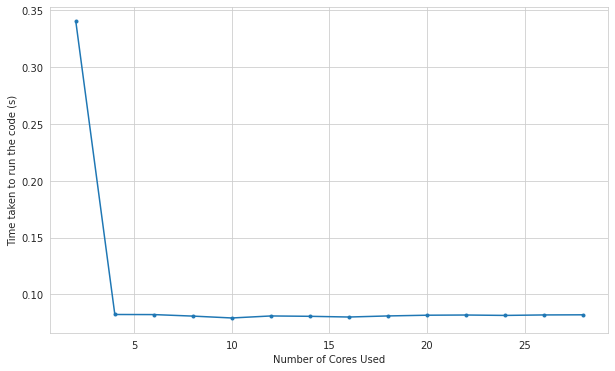

In [6]:
plt.figure(figsize=(10,6))
plt.plot(min_numba.index, min_numba["Run time (s)"], ".-")
plt.xlabel("Number of Cores Used")
plt.ylabel("Time taken to run the code (s)")

Text(0, 0.5, 'Time taken to run the code (s)')

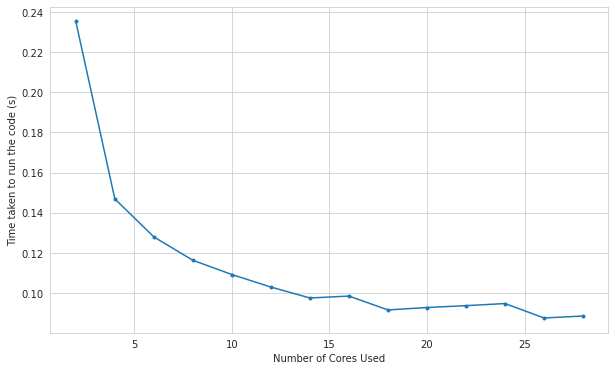

In [7]:
plt.figure(figsize=(10,6))
plt.plot(min_CyMPI.index, min_CyMPI["Run time (s)"], ".-")
plt.xlabel("Number of Cores Used")
plt.ylabel("Time taken to run the code (s)")

In [8]:
random_df = pd.read_csv("Numpy/timeInfo_Random.csv")
serial_df = pd.read_csv("Numpy/timeInfo_Serial.csv")
cython_lattice = pd.read_csv("Cython/timeInfo_Cy.csv")
original_lattice = pd.read_csv("Original/timeInfo_original.csv")

random_lattice = random_df.iloc[3:]
serial_lattice = serial_df.iloc[3:]

numba_lattice = numba_df.iloc[-6:]
MPI_lattice = MPI_df.iloc[-6:]
CyMPI_lattice = cythonMPI_df.iloc[-6:]

In [9]:
import numpy as np

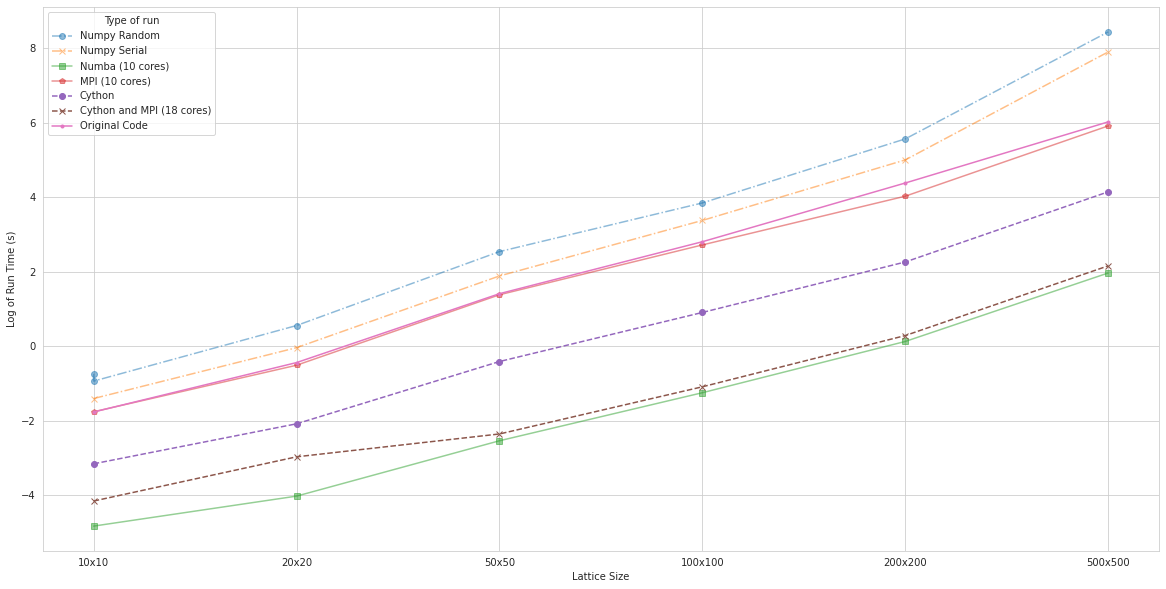

In [10]:
plt.figure(figsize=(20,10))
plt.plot(random_lattice["Size of lattice"], np.log(random_lattice["Run time (s)"]), label = "Numpy Random", marker='o', alpha = 0.5, linestyle = "-.")
plt.plot(serial_lattice["Size of lattice"], np.log(serial_lattice["Run time (s)"]), label = "Numpy Serial", marker='x', alpha = 0.5, linestyle = "-.")

plt.plot(numba_lattice["Size of lattice"], np.log(numba_lattice["Run time (s)"]), label = "Numba (10 cores)", marker='s', alpha = 0.5)

plt.plot(MPI_lattice["Size of lattice"], np.log(MPI_lattice["Run time (s)"]), label = "MPI (10 cores)", marker='p', alpha = 0.5)

plt.plot(cython_lattice["Size of lattice"], np.log(cython_lattice["Run time (s)"]), label = "Cython", marker = "o", linestyle = "--")
plt.plot(CyMPI_lattice["Size of lattice"], np.log(CyMPI_lattice["Run time (s)"]), label = "Cython and MPI (18 cores)", marker='x', linestyle = "--")
plt.plot(original_lattice["Size of lattice"], np.log(original_lattice["Run time (s)"]), label = "Original Code", marker = ".")
plt.xlabel("Lattice Size")
plt.ylabel("Log of Run Time (s)")
plt.legend(title = "Type of run")

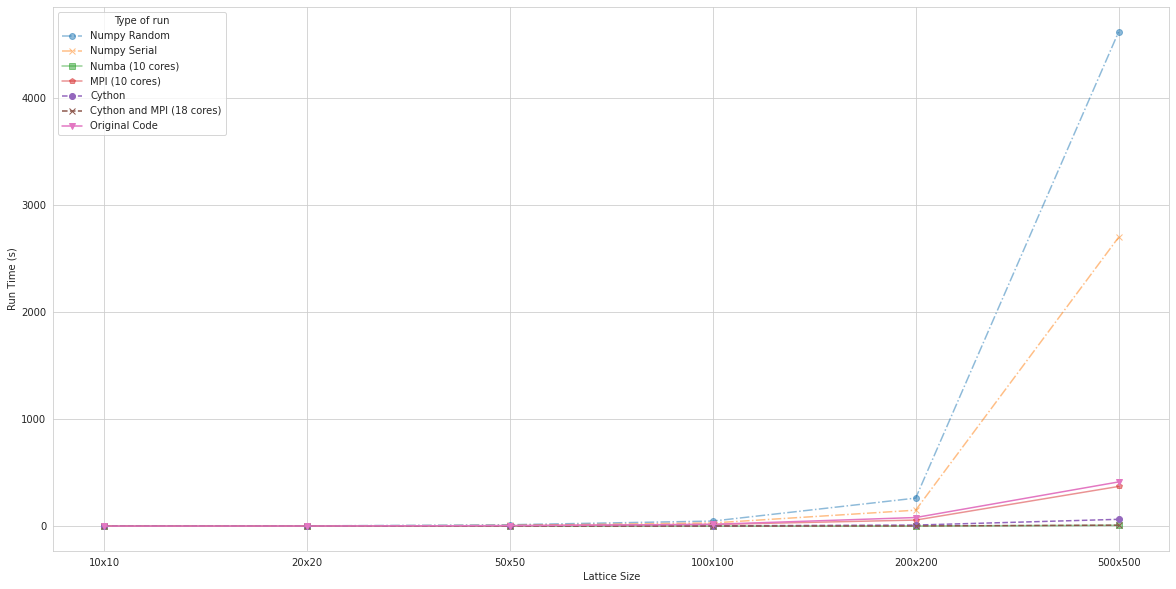

In [11]:
plt.figure(figsize=(20,10))
plt.plot(random_lattice["Size of lattice"], random_lattice["Run time (s)"], label = "Numpy Random", marker='o', alpha = 0.5, linestyle = "-.")
plt.plot(serial_lattice["Size of lattice"], serial_lattice["Run time (s)"], label = "Numpy Serial", marker='x', alpha = 0.5, linestyle = "-.")

plt.plot(numba_lattice["Size of lattice"], numba_lattice["Run time (s)"], label = "Numba (10 cores)", marker='s', alpha = 0.5)

plt.plot(MPI_lattice["Size of lattice"], MPI_lattice["Run time (s)"], label = "MPI (10 cores)", marker='p', alpha = 0.5)

plt.plot(cython_lattice["Size of lattice"], cython_lattice["Run time (s)"], label = "Cython", marker = "o", linestyle = "--")
plt.plot(CyMPI_lattice["Size of lattice"], CyMPI_lattice["Run time (s)"], label = "Cython and MPI (18 cores)", marker='x', linestyle = "--")

plt.plot(original_lattice["Size of lattice"], original_lattice["Run time (s)"], label = "Original Code", marker = "v")
plt.xlabel("Lattice Size")
plt.ylabel("Run Time (s)")
plt.legend(title = "Type of run")

In [12]:
cython_lattice

,Size of lattice,Number of MC steps,Reduced temperature,Run time (s)
0,10x10,50,0.5,0.042697
1,20x20,50,0.5,0.124914
2,50x50,50,0.5,0.664800
3,100x100,50,0.5,2.480894
4,200x200,50,0.5,9.619234
5,500x500,50,0.5,63.220494


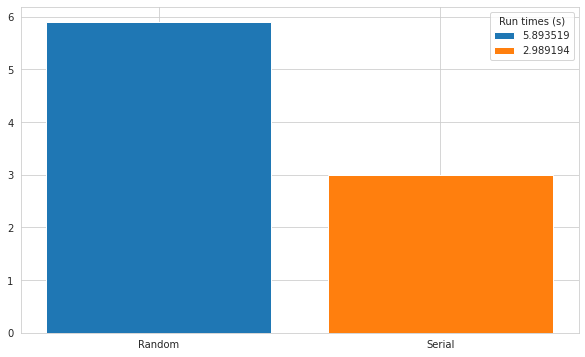

In [13]:
plt.figure(figsize=(10,6))
plt.bar(x="Random", height=random_df.iloc[0]["Run time (s)"], width=0.8, label = random_df.iloc[0]["Run time (s)"])
plt.bar(x="Serial", height=serial_df.iloc[1]["Run time (s)"], width=0.8, label = serial_df.iloc[1]["Run time (s)"])
plt.legend(title = "Run times (s)")

In [14]:
random_df

,Size of lattice,Number of MC steps,Reduced temperature,Run time (s),Plateu Num
0,20x20,300,0.3,5.893519,245
1,20x20,246,0.3,4.263307,245
2,10x10,50,0.5,0.434727,0
3,10x10,50,0.5,0.478922,0
4,10x10,50,0.5,0.392961,0
5,20x20,50,0.5,1.747255,0
6,50x50,50,0.5,12.708391,0
7,100x100,50,0.5,46.914984,0
8,200x200,50,0.5,261.730853,0
9,500x500,50,0.5,4622.669669,0


In [15]:
serial_df

,Size of lattice,Number of MC steps,Reduced temperature,Run time (s),Plateu Num
0,20x20,300,0.3,5.526794,146
1,20x20,147,0.3,2.989194,146
2,20x20,246,0.3,5.190592,146
3,10x10,50,0.5,0.246233,0
4,20x20,50,0.5,0.964554,0
5,50x50,50,0.5,6.609506,0
6,100x100,50,0.5,29.341505,0
7,200x200,50,0.5,148.938342,0
8,500x500,50,0.5,2701.389959,0
